In [5]:
import pandas as pd
sale = pd.read_csv('advertising.csv')
sale

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
print(sale.isnull())

        TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]


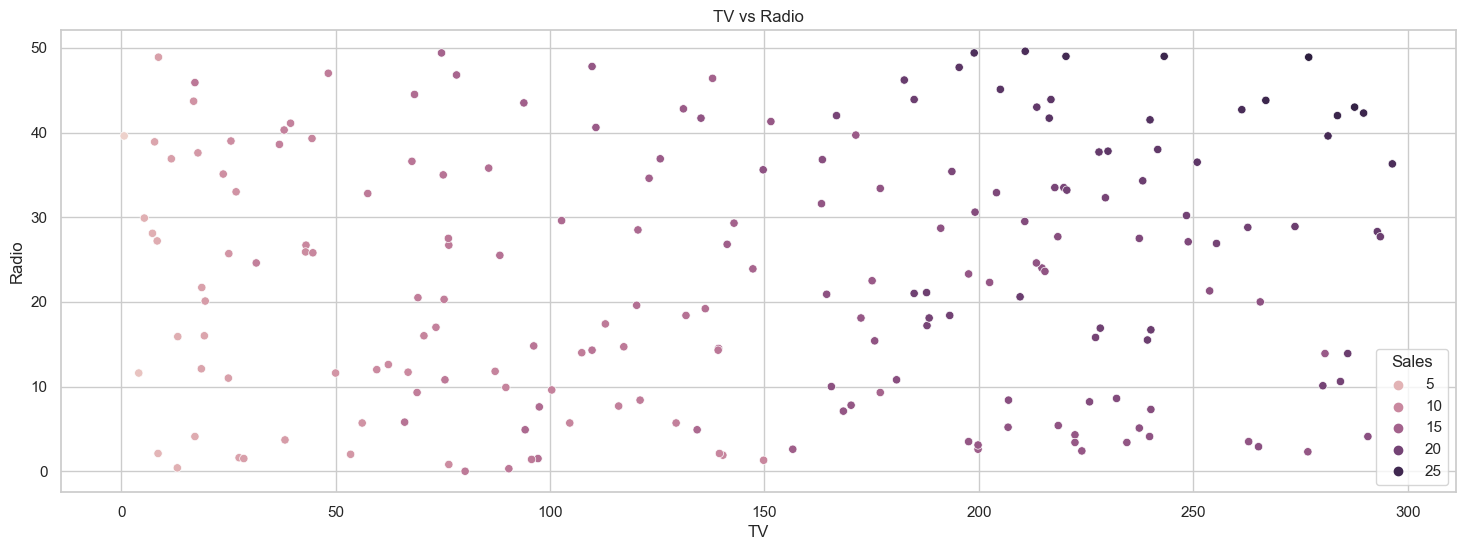

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(18,6))
sns.scatterplot(x="TV",y="Radio",hue="Sales", data=sale)
plt.title("TV vs Radio")
plt.show()

In [8]:
sale.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
print(sale.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [10]:
sale.Sales.head(200)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [11]:
x=sale.drop(columns="Sales")
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y=pd.cut(sale.Sales, bins=[0,10,20,30], labels=['low','medium','high']).head(200)
y

0        high
1      medium
2      medium
3      medium
4      medium
        ...  
195       low
196    medium
197    medium
198      high
199    medium
Name: Sales, Length: 200, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [13]:
sale=pd.DataFrame({'Sales_category':['high','medium','low','medium','high']*40})
category_mapping={'low':0,'medium':1,'high':2}
sale['Sales_category']=sale['Sales_category'].replace('category_mapping')
sale

,Sales_category
0,high
1,medium
2,low
3,medium
4,high
...,...
195,high
196,medium
197,low
198,medium


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
Xt,Xtest,Yt,Ytest = train_test_split(x,y, test_size=0.2)#spliting the data
model = LogisticRegression()#creating the model
model.fit(Xt,Yt)#training the model
predictions = model.predict(Xt)#predicting 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Yt,predictions)#finding the accuracy
print(accuracy)

0.8875
